# Rainfall Weather Forecasting

Project Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station
MinTemp  -The minimum temperature in degrees celsius
MaxTemp -The maximum temperature in degrees celsius
Rainfall  -The amount of rainfall recorded for the day in mm
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine  -The number of hours of bright sunshine in the day.
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am -Direction of the wind at 9am
WindDir3pm -Direction of the wind at 3pm
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am -Humidity (percent) at 9am
Humidity3pm -Humidity (percent) at 3pm
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am - Fraction of sky obscured by cloud at 9am. 
Cloud3pm -Fraction of sky obscured by cloud 
Temp9am-Temperature (degrees C) at 9am
Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


Dataset Link-  
•	https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv
•	https://github.com/dsrscientist/dataset3





In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [4]:
!pip install imbalanced-learn

In [ ]:
conda install -c conda-forge imbalanced-learn

In [ ]:
conda update -n base -c defaults conda


In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn

In [56]:
#importing dataset

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv', sep=',')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

# Exploratory Data Analysis

In [58]:
#Checking the null values in each column

df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [59]:
#total null values

df.isnull().sum().sum()

19472

In [60]:
#checking for duplicate values

df.drop_duplicates(inplace=True)
df.shape

(6762, 23)

In [73]:
#Filling null values in the columns with missing values 

df1=df.fillna(df.mean())


In [74]:
df1.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      942
WindGustSpeed      0
WindDir9am       794
WindDir3pm       294
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        138
RainTomorrow     138
dtype: int64

In [63]:
#Now remove null value from the date column

df1=df1.dropna(subset=['Date'])


In [64]:
#now we have to fix Date column null value:

df1.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      942
WindGustSpeed      0
WindDir9am       794
WindDir3pm       294
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        138
RainTomorrow     138
dtype: int64

In [65]:
#checking the dimension of the dataset

df1.shape

(6762, 23)

In [66]:
df1.columns.tolist()

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [67]:
df1.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.400000,0.0,5.302395,7.890896,E,31.000000,SE,...,51.0,24.0,1024.6,1020.3,4.336806,4.320988,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.300000,0.0,5.302395,7.890896,NNW,22.000000,SE,...,56.0,21.0,1023.5,1019.1,4.336806,4.320988,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.900000,0.0,5.302395,7.890896,N,37.000000,SE,...,53.0,24.0,1021.0,1016.8,4.336806,4.320988,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.000000,0.0,5.302395,7.890896,SE,28.000000,SSE,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,24.098345,0.0,5.302395,7.890896,NaN,38.977663,ESE,...,62.0,36.0,1020.2,1017.9,8.000000,8.000000,15.0,20.9,No,NaN


<AxesSubplot:>

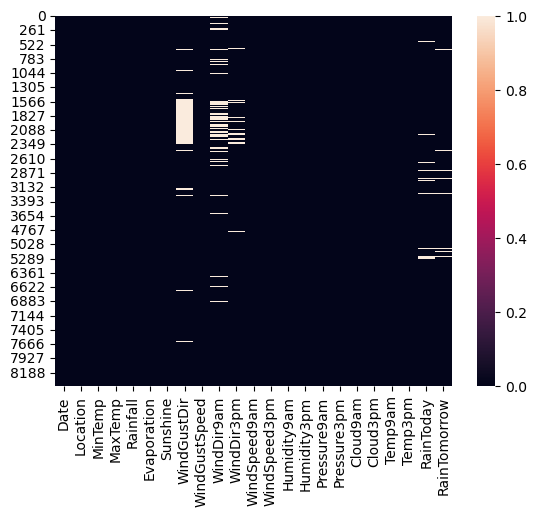

In [68]:
#lets visualize it using heatmap
sns.heatmap(df1.isnull())

This gives the brief about the dataset which includes indexing type, indexing type, column type, no null values and memory usage. 

### Our Target variables, RainToday and RainTomorrow are in categorical data 

In [69]:
df1['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [75]:
df1['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [76]:
# We will remove NAN values from the RainToday, RainTommorow, WindGustDir, WindDir9am,WindDir3pm

df1.dropna(subset=['RainToday', 'RainTomorrow', 'WindGustDir', 'WindDir9am','WindDir3pm'], inplace=True)

In [77]:
#checking the value counts of each column

for i in df1.columns:
    print(df1[i].value_counts())
    print("\n")

2011-06-14    4
2011-03-16    4
2011-03-08    4
2011-03-07    4
2011-03-05    4
             ..
2016-07-22    1
2016-07-21    1
2016-07-20    1
2016-07-19    1
2012-11-10    1
Name: Date, Length: 2830, dtype: int64


PerthAirport    1164
Melbourne        703
Albury           701
CoffsHarbour     567
Brisbane         544
Williamtown      523
Penrith          369
Darwin           250
Wollongong       224
Adelaide         185
Uluru             36
Name: Location, dtype: int64


 12.7    47
 13.2    44
 10.8    42
 16.4    42
 13.3    40
         ..
-0.5      1
 0.4      1
 0.3      1
 0.1      1
 26.0     1
Name: MinTemp, Length: 278, dtype: int64


19.0    46
22.3    45
22.6    44
22.0    42
20.8    41
        ..
39.9     1
39.3     1
9.4      1
45.5     1
43.5     1
Name: MaxTemp, Length: 329, dtype: int64


0.0      3500
0.2       233
0.4       111
0.6        65
1.4        57
         ... 
73.8        1
23.8        1
61.2        1
128.0       1
20.4        1
Name: Rainfall, Length: 230,

These are the value counts of all columns, let's check the unique value of column.

# Exploring data



In [79]:
df1.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000
mean,13.457829,24.379966,2.745404,5.317630,7.946807,39.804596,14.599126,18.737562,65.627897,49.643740,1017.445606,1014.946546,4.331431,4.305500,18.336611,22.957028
std,5.481139,6.243559,9.298133,3.076754,2.971998,14.099860,9.128572,8.815502,17.144967,18.781419,6.398660,6.330291,2.442047,2.344383,5.667166,6.087052
min,-1.300000,8.200000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.400000,19.800000,0.000000,3.600000,7.890896,30.000000,7.000000,11.000000,54.000000,36.000000,1013.300000,1010.600000,2.000000,2.000000,14.300000,18.600000
50%,13.450000,23.800000,0.000000,5.302395,7.890896,37.000000,13.000000,19.000000,66.000000,49.000000,1017.626311,1015.119923,4.336806,4.320988,18.200000,22.400000
75%,17.700000,28.800000,0.800000,6.000000,9.800000,48.000000,20.000000,24.000000,78.000000,62.000000,1021.400000,1018.900000,7.000000,6.000000,22.600000,27.100000
max,28.500000,45.500000,225.000000,59.200000,13.900000,107.000000,61.000000,61.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [80]:
#Seperating Numerical and Categorical columns

#checking for categorical columns

categorical_col = []
for i in df1.dtypes.index:
    if df1.dtypes[i]!="float":
        categorical_col.append(i)
print("categorical Columns:",categorical_col)

#checking for numerical columns

numerical_col = []
for i in df1.dtypes.index:
    if df1.dtypes[i]=="float":
        numerical_col.append(i)
print("Numerical Columns:",numerical_col)


categorical Columns: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Numerical Columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [81]:
df1.describe().round(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,5266.00,5266.00,5266.00,5266.00,5266.00,5266.0,5266.00,5266.00,5266.00,5266.00,5266.00,5266.00,5266.00,5266.00,5266.00,5266.00
mean,13.46,24.38,2.75,5.32,7.95,39.8,14.60,18.74,65.63,49.64,1017.45,1014.95,4.33,4.31,18.34,22.96
std,5.48,6.24,9.30,3.08,2.97,14.1,9.13,8.82,17.14,18.78,6.40,6.33,2.44,2.34,5.67,6.09
min,-1.30,8.20,0.00,0.00,0.00,9.0,2.00,2.00,10.00,6.00,989.80,982.90,0.00,0.00,1.90,7.30
25%,9.40,19.80,0.00,3.60,7.89,30.0,7.00,11.00,54.00,36.00,1013.30,1010.60,2.00,2.00,14.30,18.60
50%,13.45,23.80,0.00,5.30,7.89,37.0,13.00,19.00,66.00,49.00,1017.63,1015.12,4.34,4.32,18.20,22.40
75%,17.70,28.80,0.80,6.00,9.80,48.0,20.00,24.00,78.00,62.00,1021.40,1018.90,7.00,6.00,22.60,27.10
max,28.50,45.50,225.00,59.20,13.90,107.0,61.00,61.00,100.00,99.00,1039.00,1036.00,8.00,8.00,39.40,44.10


This gives the statistical information of the numerical columns.

From the above description we can observe the following:

The counts of all the columns are same which means there are no missing values in the data set.

The mean value is slightly higher than the median(50%) of most of the columns specifically, which means the data is skewed to right in the mentioned column.

By summarizing the data we can observe there is a huge difference between 75% and max hence there are outliers present in the data

We can also notice the Standard deviation, min 25% values from the described method.

# Data Visualization 


Univariate Analysis

No     3997
Yes    1269
Name: RainToday, dtype: int64


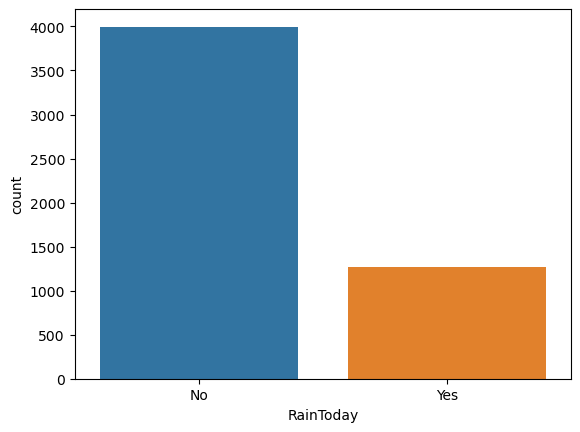

In [82]:
#visualize the Rain Today

ax=sns.countplot(x= 'RainToday',data=df1)
print(df1['RainToday'].value_counts())


No     4002
Yes    1264
Name: RainTomorrow, dtype: int64


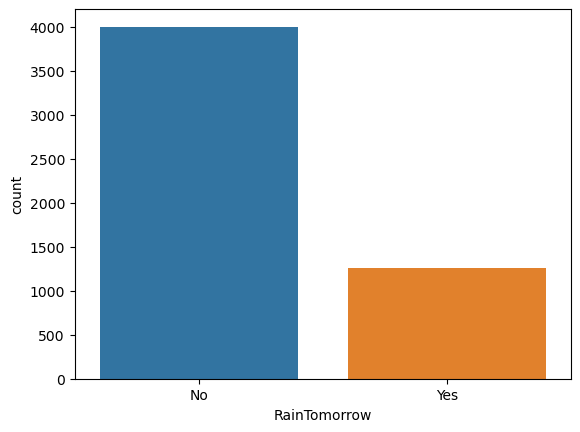

In [83]:
#visualize the Rain Tomorrow 

ax=sns.countplot(x= 'RainTomorrow',data=df1)
print(df1['RainTomorrow'].value_counts())


In [84]:
df1.corr().round(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.00,0.73,0.09,0.35,0.05,0.20,0.12,0.16,-0.12,0.07,-0.45,-0.45,0.07,0.02,0.88,0.70
MaxTemp,0.73,1.00,-0.11,0.44,0.38,0.13,0.02,0.07,-0.43,-0.44,-0.33,-0.42,-0.28,-0.27,0.88,0.98
Rainfall,0.09,-0.11,1.00,-0.05,-0.23,0.11,0.06,0.04,0.29,0.28,-0.10,-0.05,0.22,0.19,-0.03,-0.12
Evaporation,0.35,0.44,-0.05,1.00,0.32,0.20,0.17,0.13,-0.32,-0.25,-0.24,-0.26,-0.11,-0.15,0.41,0.43
Sunshine,0.05,0.38,-0.23,0.32,1.00,0.00,0.01,0.05,-0.41,-0.48,-0.00,-0.06,-0.61,-0.62,0.26,0.40
WindGustSpeed,0.20,0.13,0.11,0.20,0.00,1.00,0.64,0.70,-0.25,-0.10,-0.38,-0.35,0.03,0.07,0.17,0.09
WindSpeed9am,0.12,0.02,0.06,0.17,0.01,0.64,1.00,0.54,-0.31,-0.10,-0.16,-0.12,-0.02,0.03,0.09,0.01
WindSpeed3pm,0.16,0.07,0.04,0.13,0.05,0.70,0.54,1.00,-0.18,-0.04,-0.26,-0.22,0.01,0.01,0.16,0.04
Humidity9am,-0.12,-0.43,0.29,-0.32,-0.41,-0.25,-0.31,-0.18,1.00,0.66,0.12,0.17,0.44,0.34,-0.39,-0.42
Humidity3pm,0.07,-0.44,0.28,-0.25,-0.48,-0.10,-0.10,-0.04,0.66,1.00,-0.01,0.06,0.44,0.46,-0.15,-0.51


<AxesSubplot:>

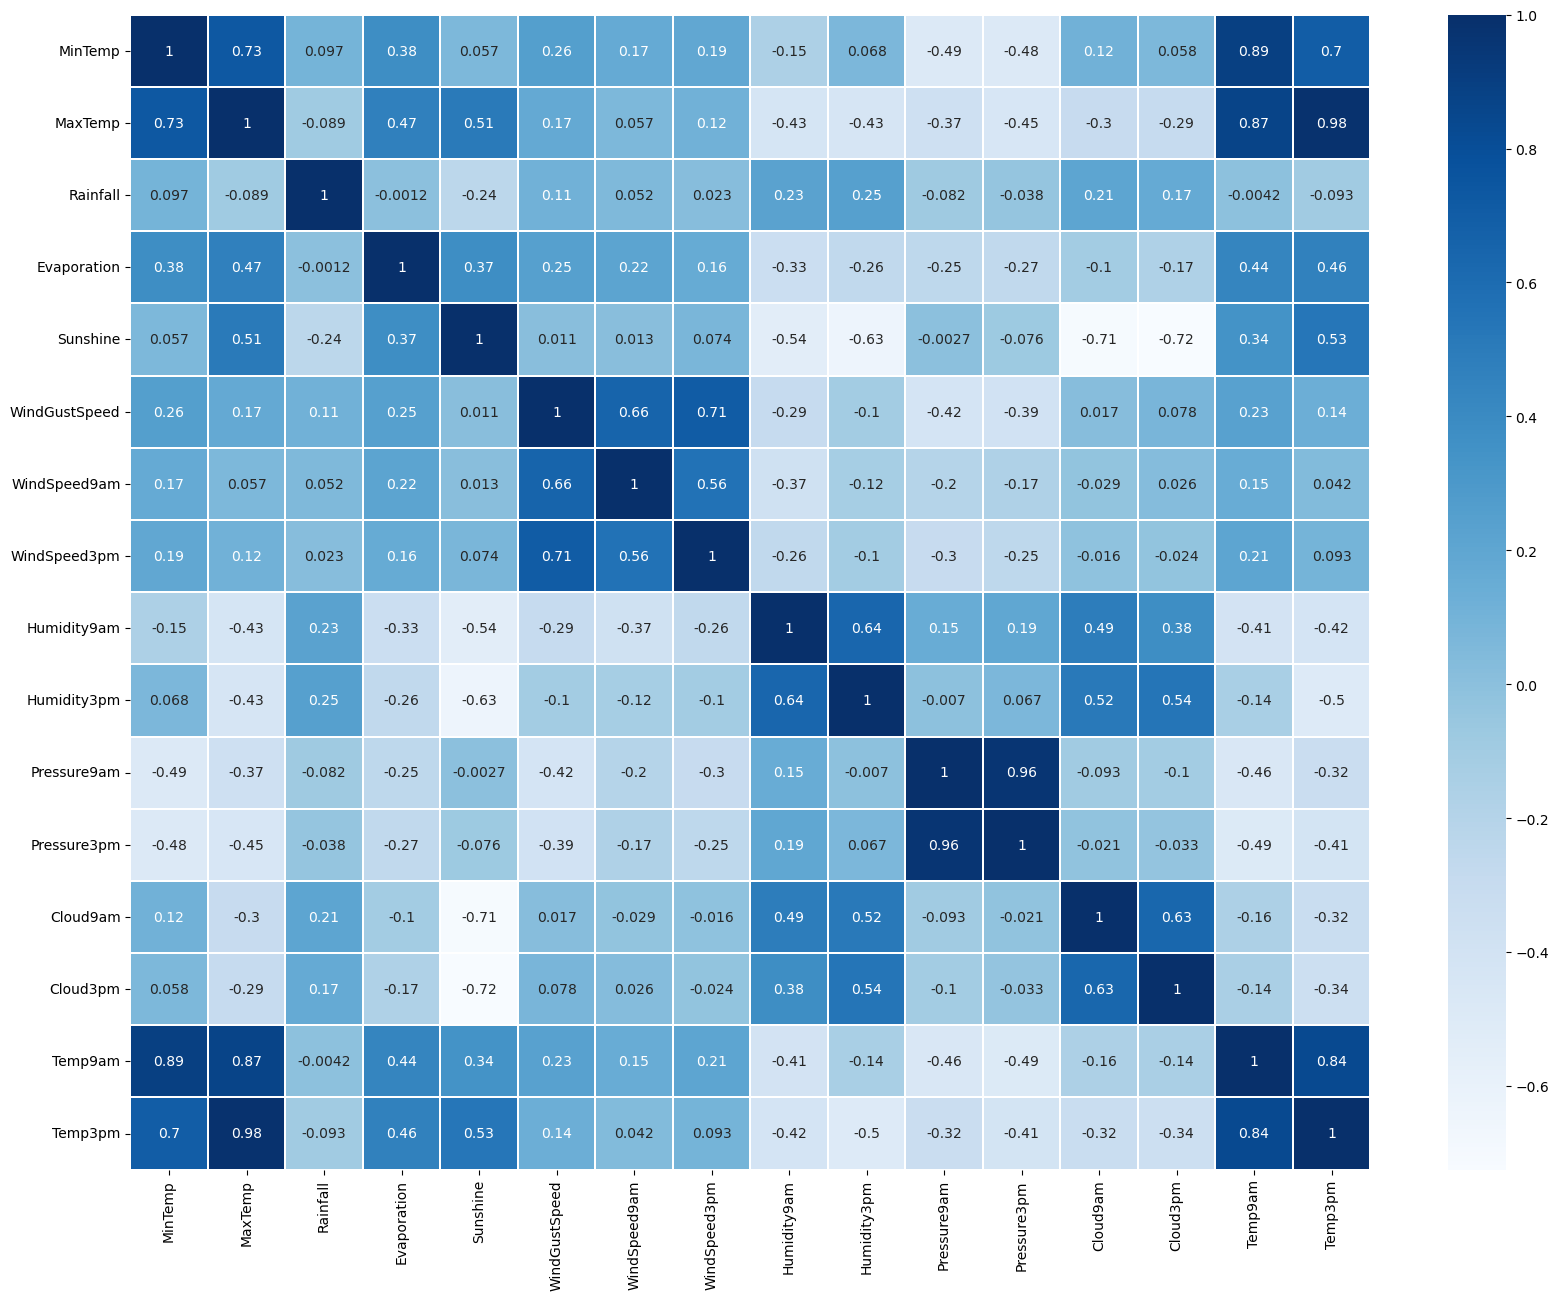

In [85]:
#Correlation map to display the most correlated variables:

cor = df1.corr(method ="pearson")
f, ax=plt.subplots(figsize = (20,15))
sns.heatmap(df.corr(),cmap="Blues",annot=True, ax= ax,linewidth=.25)



In [87]:
cor.value_counts().sort_index(ascending=True)

MinTemp    MaxTemp    Rainfall   Evaporation  Sunshine   WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am   Cloud3pm   Temp9am    Temp3pm  
-0.448460  -0.418345  -0.052780  -0.259678    -0.063138  -0.348563      -0.124155     -0.216742      0.165207     0.061646     0.962294     1.000000    -0.018778  -0.022927  -0.459583  -0.385247    1
-0.446032  -0.333484  -0.100183  -0.243260    -0.003971  -0.379425      -0.156580     -0.261781      0.120953    -0.014661     1.000000     0.962294    -0.085397  -0.084751  -0.422380  -0.291706    1
-0.123278  -0.428938   0.286266  -0.321592    -0.414735  -0.248277      -0.311715     -0.179289      1.000000     0.662406     0.120953     0.165207     0.442968   0.335956  -0.387118  -0.422311    1
 0.023622  -0.267076   0.185820  -0.154477    -0.622371   0.070411       0.032243      0.014255      0.335956     0.456104    -0.084751    -0.022927     0.606859   1.000000  -0.151527  -0.307817    1
 0.04

Looking at the correlation graph, MinTemp and MaxTemp with Temp9am and Temp3pm has good correlation, Rainfall has correlated good with Humidity9am/3pm and Cloud9am/3pm, Sunshine is negatively correlated with sunshine -0.24 

In [88]:
#changing categorical columns into encoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_col:
    df1[col] = label_encoder.fit_transform(df1[col])

print(df1)



      Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        0         1     13.4     22.9       0.6     5.302395  7.890896   
1        1         1      7.4     25.1       0.0     5.302395  7.890896   
2        2         1     12.9     25.7       0.0     5.302395  7.890896   
3        3         1      9.2     28.0       0.0     5.302395  7.890896   
4        4         1     17.5     32.3       1.0     5.302395  7.890896   
...    ...       ...      ...      ...       ...          ...       ...   
8419  2824         8      3.5     21.8       0.0     5.302395  7.890896   
8420  2825         8      2.8     23.4       0.0     5.302395  7.890896   
8421  2826         8      3.6     25.3       0.0     5.302395  7.890896   
8422  2827         8      5.4     26.9       0.0     5.302395  7.890896   
8423  2828         8      7.8     27.0       0.0     5.302395  7.890896   

      WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0              13   

<AxesSubplot:xlabel='RainToday', ylabel='Density'>

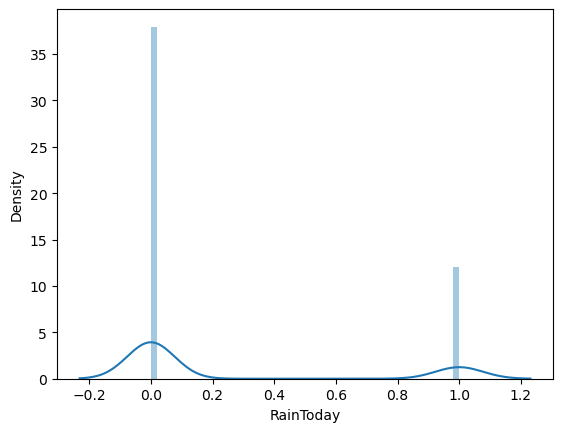

In [89]:
#Analyze the Target variable y1, first change the encoding

sns.distplot(df1.RainToday)

<AxesSubplot:xlabel='RainTomorrow', ylabel='Density'>

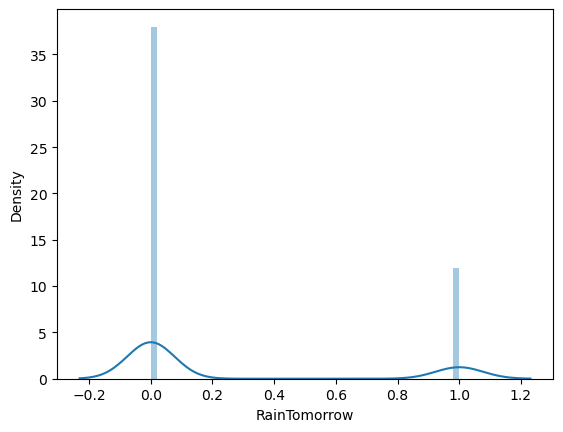

In [90]:
#Analyze the Target variable y2

sns.distplot(df1.RainTomorrow)

# Bivariate Analysis

comparing two variables for quantitative analysis:


Text(0, 0.5, 'Rain Today')

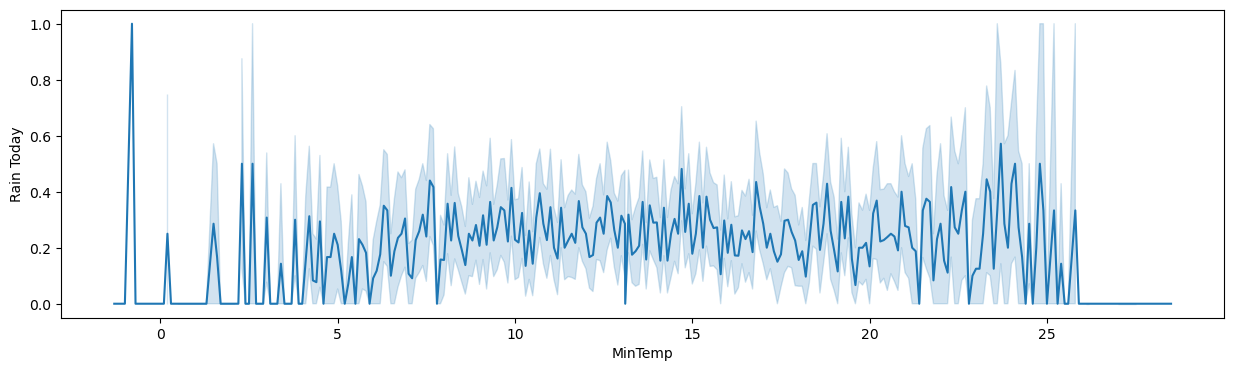

In [91]:
# LDAPS_RHmin vs Next_Tmin

plt.figure(figsize=(15,4))
sns.lineplot(df1['MinTemp'],df1['RainToday'],data=df1)
plt.xlabel('MinTemp')
plt.ylabel('Rain Today')

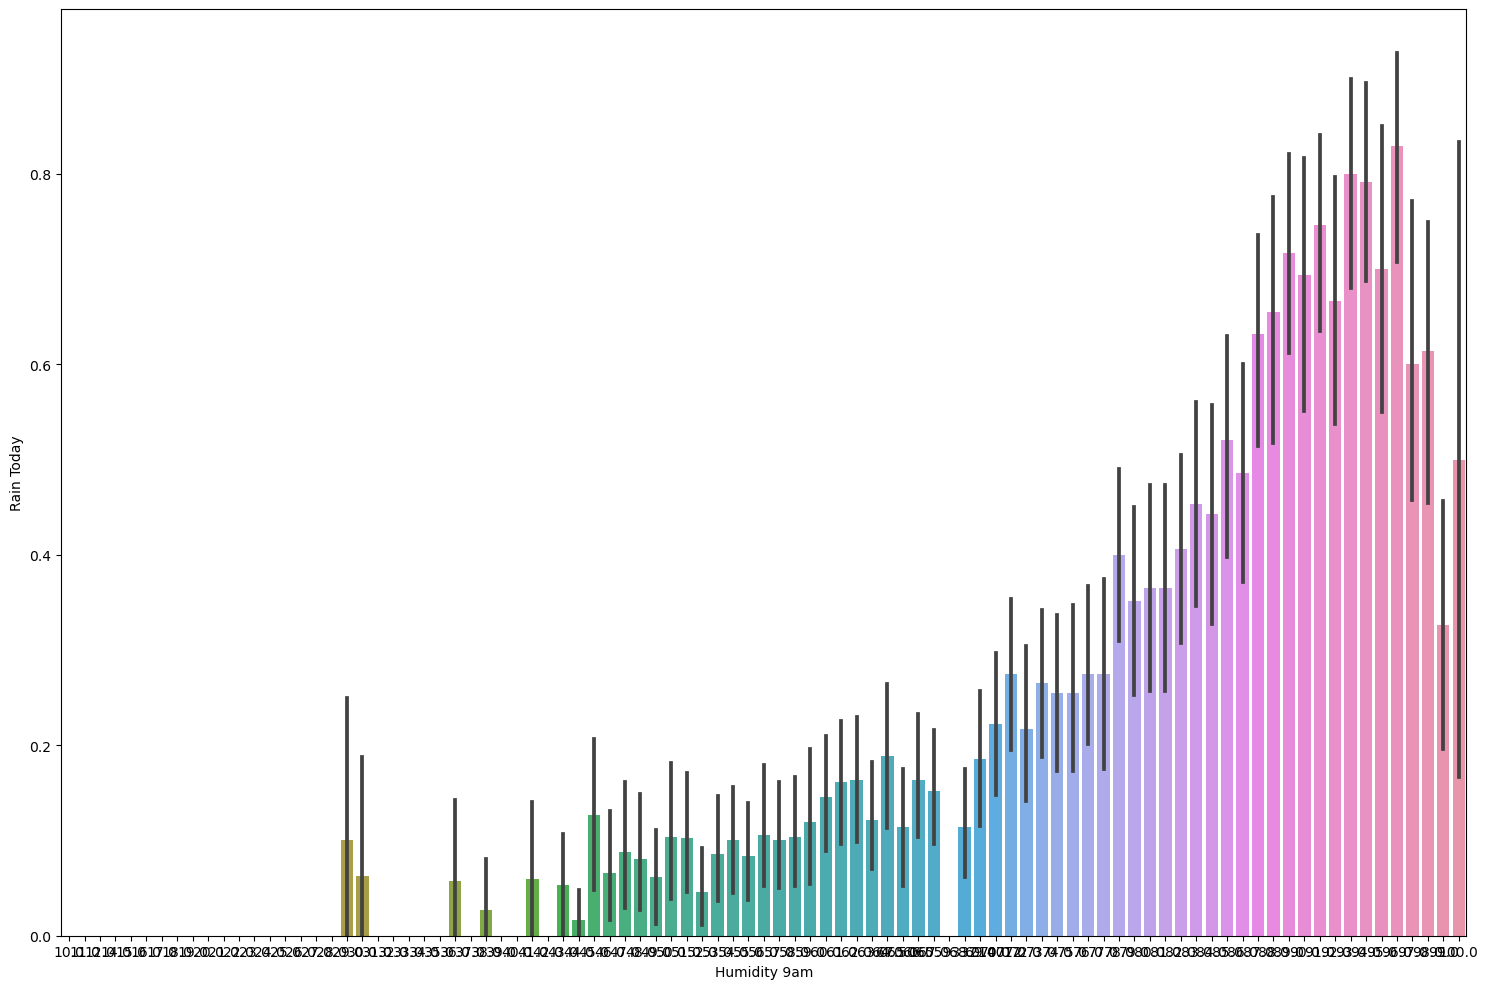

In [92]:

plt.figure(figsize=(15,10))
sns.barplot(df1['Humidity9am'],df1['RainToday'],data=df1)
plt.xlabel('Humidity 9am')
plt.ylabel('Rain Today')
plt.tight_layout()  # To ensure labels are fully visible
plt.show()

This graph shows that if humidity level is high there are more chances of rain fall


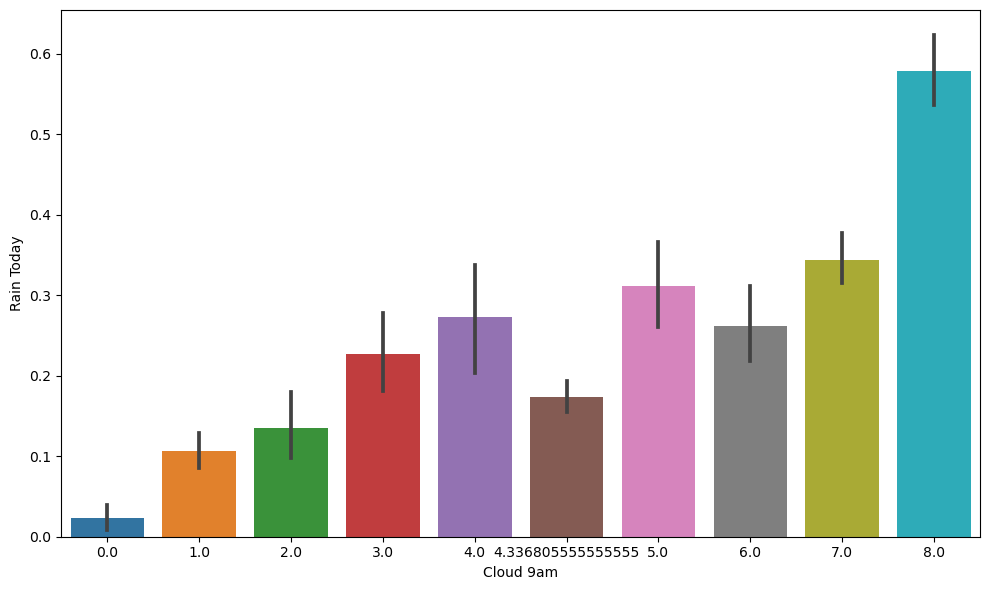

In [93]:

plt.figure(figsize=(10,6))
sns.barplot(df1['Cloud9am'],df1['RainToday'],data=df1)
plt.xlabel('Cloud 9am')
plt.ylabel('Rain Today')
plt.tight_layout()  # To ensure labels are fully visible
plt.show()


Text(0, 0.5, 'Rain Today')

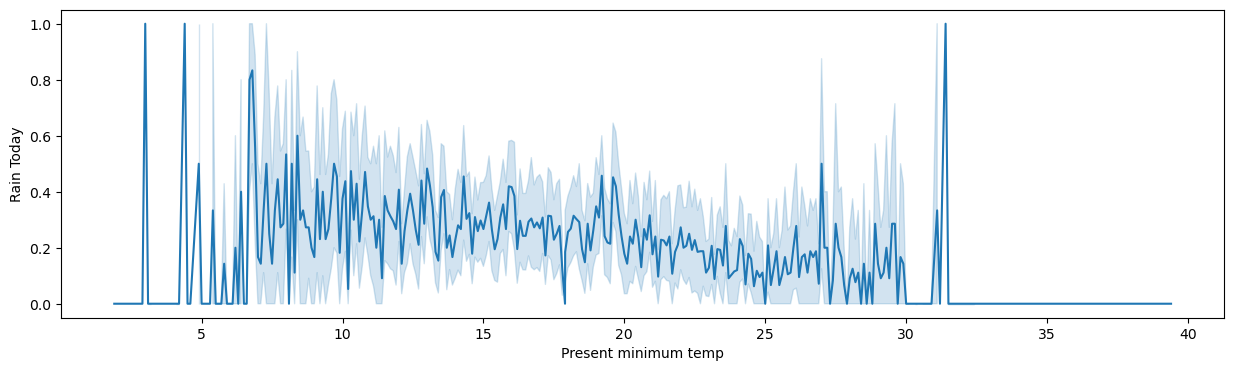

In [94]:
#Lets visualize min Temp with raintoday

plt.figure(figsize=(15,4))
sns.lineplot(df1['Temp9am'],df1['RainToday'],data=df1)
plt.xlabel('Present minimum temp')
plt.ylabel('Rain Today')


Text(0, 0.5, 'Rain Tomorrow')

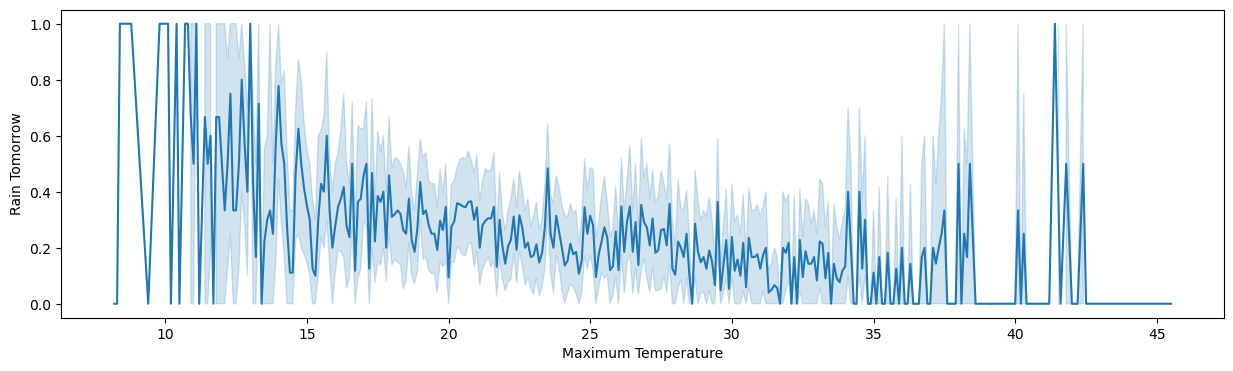

In [95]:
# lets visualize Rain Tomorrow with MaxTemp

plt.figure(figsize=(15,4))
sns.lineplot(df1['MaxTemp'],df1['RainTomorrow'],data=df1)
plt.xlabel('Maximum Temperature')
plt.ylabel('Rain Tomorrow')

Text(0, 0.5, 'Next day Rain tomorrow')

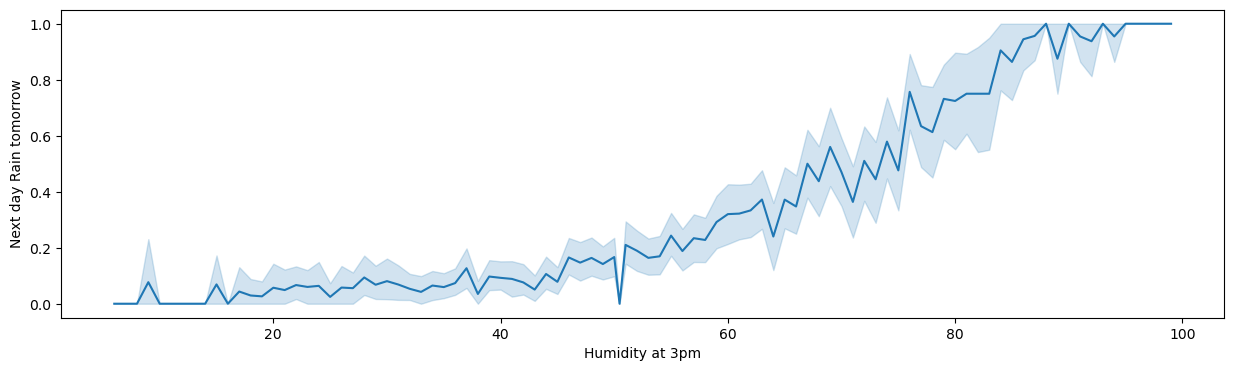

In [96]:
# Rain tomorrow at humidity at 3pm level

plt.figure(figsize=(15,4))
sns.lineplot(df1['Humidity3pm'],df1['RainTomorrow'],data=df1)
plt.xlabel('Humidity at 3pm')
plt.ylabel('Next day Rain tomorrow')

Text(0, 0.5, 'Rain Tomorrow')

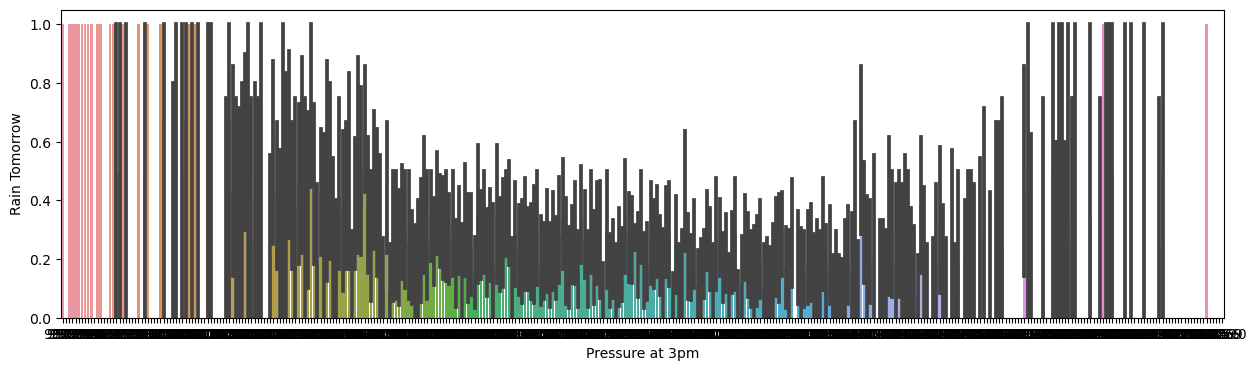

In [98]:
# Present_Tmax vs Next_Tmax

plt.figure(figsize=(15,4))
sns.barplot(df1['Pressure3pm'],df1['RainTomorrow'],data=df1)
plt.xlabel('Pressure at 3pm')
plt.ylabel('Rain Tomorrow')


After looking at the correlation and the graph, Raintoday depends on the minTemp, humidity9am, cloud9am and RainTomorrow depends on the temperature max, Humidity 3pm, Clouds 3pm!

In [102]:
df1.corr()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,1.000000,0.432015,-0.013276,0.065847,-0.010283,0.159838,0.075062,-0.013157,-0.043915,-0.028608,...,0.024184,-0.090932,0.073475,0.062230,-0.009621,-0.031185,0.025901,0.075794,-0.026674,-0.027773
Location,0.432015,1.000000,0.068013,0.042542,-0.005460,0.146566,0.052858,-0.048548,0.257226,-0.115575,...,-0.020762,0.010036,0.004029,0.019866,0.010746,-0.002570,0.067699,0.039581,-0.011033,-0.012565
MinTemp,-0.013276,0.068013,1.000000,0.729276,0.089953,0.349939,0.047251,-0.192440,0.197085,-0.083102,...,-0.123278,0.065081,-0.446032,-0.448460,0.068149,0.023622,0.883569,0.698605,0.044917,0.075026
MaxTemp,0.065847,0.042542,0.729276,1.000000,-0.114239,0.440843,0.383562,-0.268371,0.128354,-0.251234,...,-0.428938,-0.443745,-0.333484,-0.418345,-0.276559,-0.267076,0.876028,0.980469,-0.260636,-0.191393
Rainfall,-0.010283,-0.005460,0.089953,-0.114239,1.000000,-0.053214,-0.225581,0.063098,0.107207,0.109935,...,0.286266,0.283082,-0.100183,-0.052780,0.215350,0.185820,-0.028649,-0.118092,0.514120,0.273871
Evaporation,0.159838,0.146566,0.349939,0.440843,-0.053214,1.000000,0.322332,-0.118748,0.197498,-0.106871,...,-0.321592,-0.245437,-0.243260,-0.259678,-0.113656,-0.154477,0.413000,0.431723,-0.166452,-0.103787
Sunshine,0.075062,0.052858,0.047251,0.383562,-0.225581,0.322332,1.000000,-0.117489,0.002409,-0.094516,...,-0.414735,-0.476987,-0.003971,-0.063138,-0.612978,-0.622371,0.263670,0.403031,-0.283335,-0.389114
WindGustDir,-0.013157,-0.048548,-0.192440,-0.268371,0.063098,-0.118748,-0.117489,1.000000,-0.001897,0.403891,...,0.103409,0.102157,-0.120542,-0.029947,0.131643,0.104385,-0.219117,-0.282173,0.152529,0.060376
WindGustSpeed,-0.043915,0.257226,0.197085,0.128354,0.107207,0.197498,0.002409,-0.001897,1.000000,-0.148187,...,-0.248277,-0.097976,-0.379425,-0.348563,0.026588,0.070411,0.166066,0.092515,0.089096,0.197198
WindDir9am,-0.028608,-0.115575,-0.083102,-0.251234,0.109935,-0.106871,-0.094516,0.403891,-0.148187,1.000000,...,0.124522,0.177465,-0.000047,0.085709,0.100997,0.062066,-0.153535,-0.257323,0.181245,0.037747


# Visualizing the correlation between label and features using bar plot 


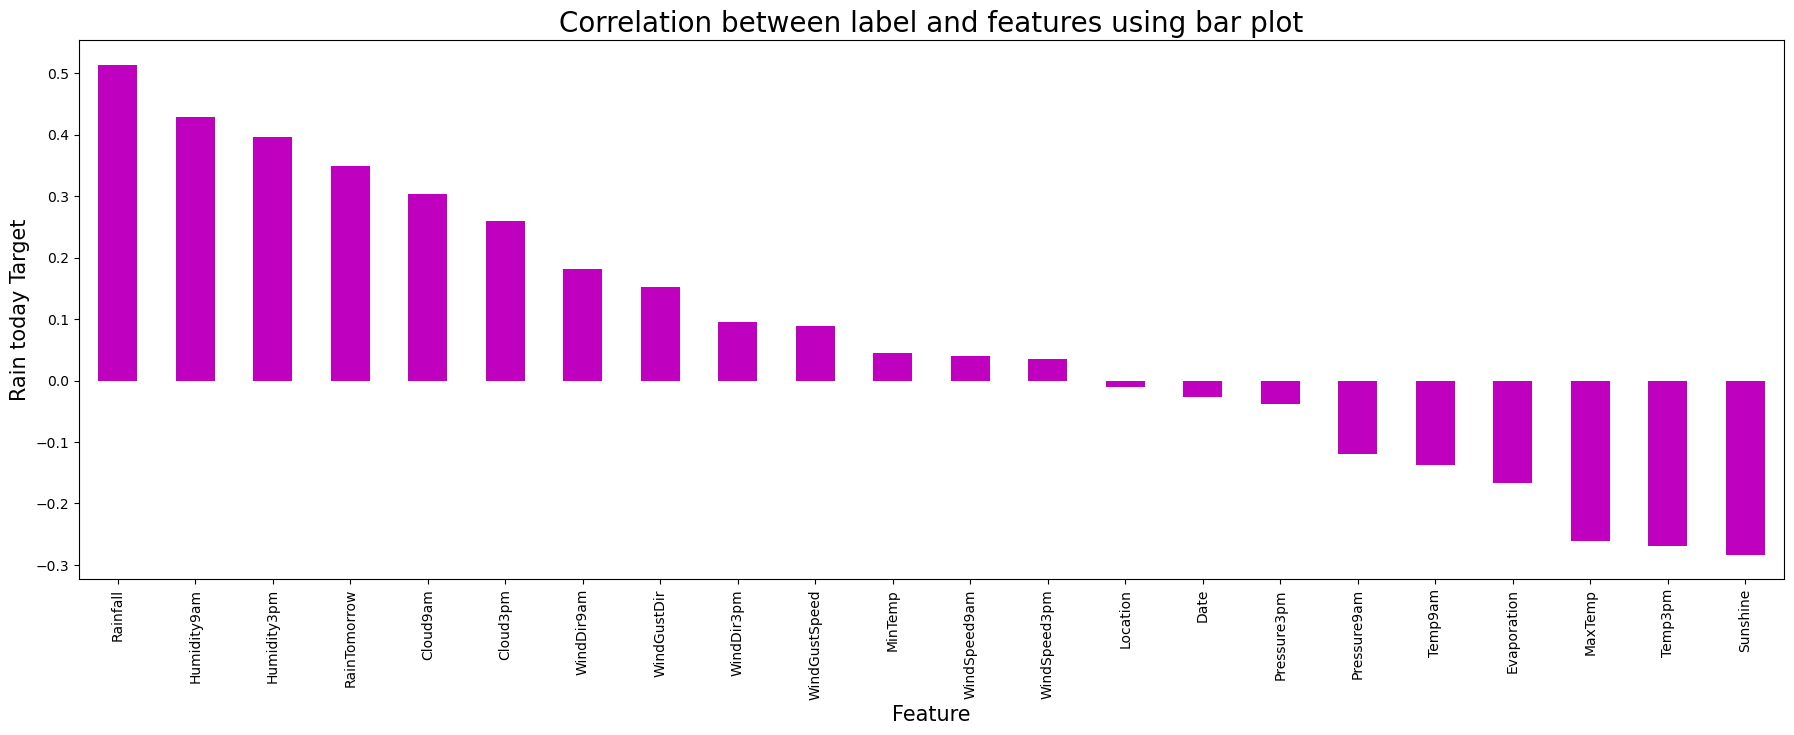

In [103]:

plt.figure(figsize = (22,7))
df1.corr()['RainToday'].sort_values(ascending = False).drop(['RainToday']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize = 15)
plt.ylabel('Rain today Target',fontsize = 15)
plt.title("Correlation between label and features using bar plot",fontsize=20)                                                        
plt.show()

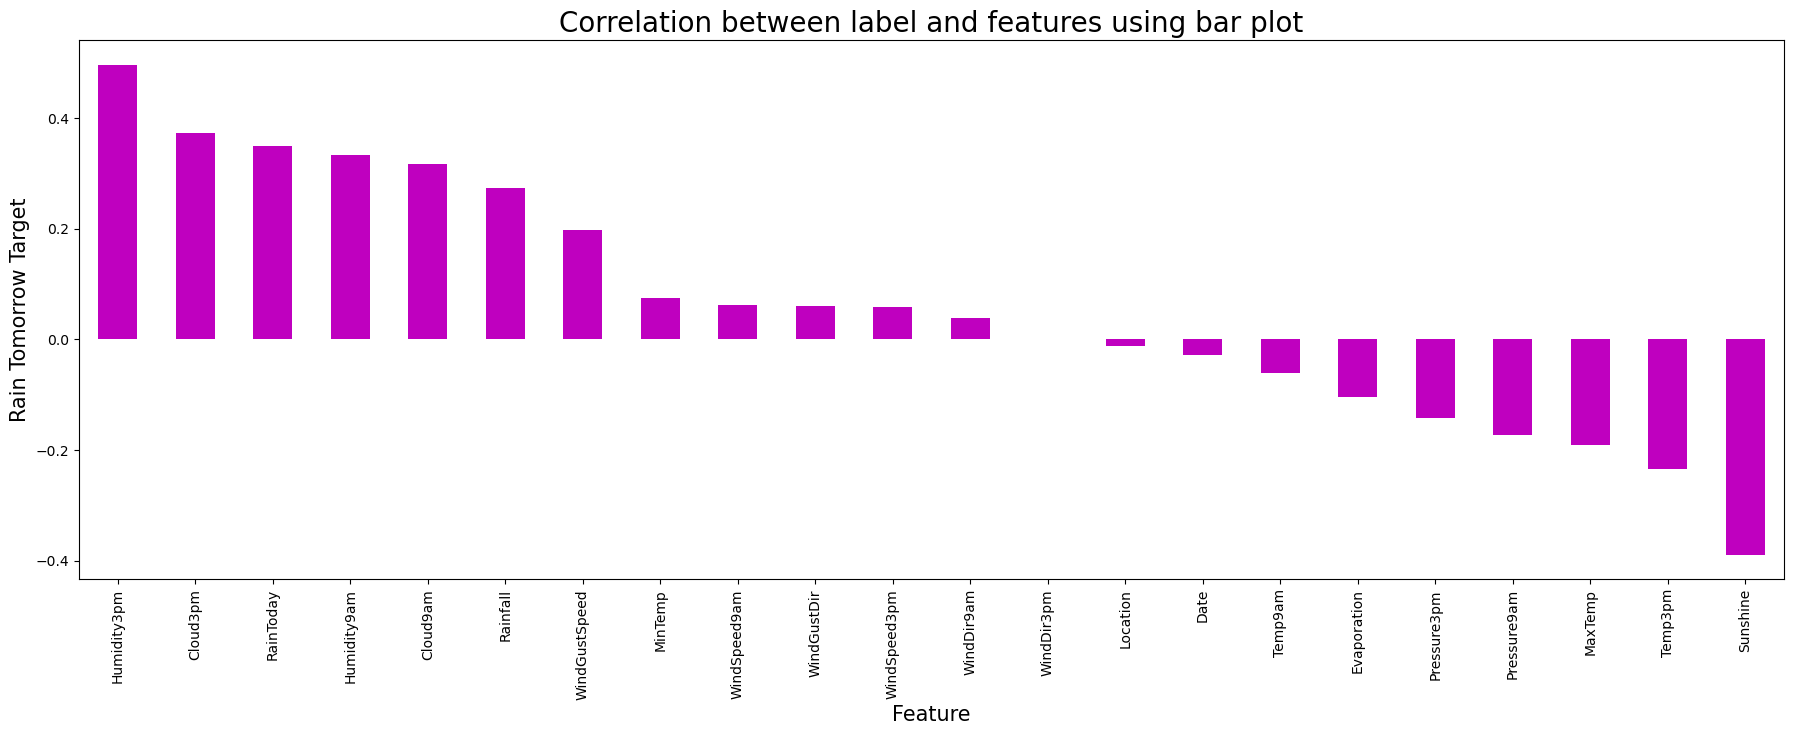

In [104]:
#Lets plot the relation for RainTomorrow:


plt.figure(figsize = (22,7))
df1.corr()['RainTomorrow'].sort_values(ascending = False).drop(['RainTomorrow']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize = 15)
plt.ylabel('Rain Tomorrow Target',fontsize = 15)
plt.title("Correlation between label and features using bar plot",fontsize=20)                                                        
plt.show()

Looking at both relation of target with features, some columns which are not relevant: Location, Date, WinDir9am, WinDir3pm, WindGustDir, WindGustSpeed9am


In [105]:
#Lets drop the irrelevant columns from the data,

df1.drop(columns=['Location', 'Date', 'WindDir9am', 'WindDir3pm', 'WindGustDir', 'WindGustSpeed'],axis=1,inplace=True)


In [106]:
df1

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.302395,7.890896,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.320988,16.9,21.8,0,0
1,7.4,25.1,0.0,5.302395,7.890896,4.0,22.0,44.0,25.0,1010.6,1007.8,4.336806,4.320988,17.2,24.3,0,0
2,12.9,25.7,0.0,5.302395,7.890896,19.0,26.0,38.0,30.0,1007.6,1008.7,4.336806,2.000000,21.0,23.2,0,0
3,9.2,28.0,0.0,5.302395,7.890896,11.0,9.0,45.0,16.0,1017.6,1012.8,4.336806,4.320988,18.1,26.5,0,0
4,17.5,32.3,1.0,5.302395,7.890896,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,3.5,21.8,0.0,5.302395,7.890896,15.0,13.0,59.0,27.0,1024.7,1021.2,4.336806,4.320988,9.4,20.9,0,0
8420,2.8,23.4,0.0,5.302395,7.890896,13.0,11.0,51.0,24.0,1024.6,1020.3,4.336806,4.320988,10.1,22.4,0,0
8421,3.6,25.3,0.0,5.302395,7.890896,13.0,9.0,56.0,21.0,1023.5,1019.1,4.336806,4.320988,10.9,24.5,0,0
8422,5.4,26.9,0.0,5.302395,7.890896,9.0,9.0,53.0,24.0,1021.0,1016.8,4.336806,4.320988,12.5,26.1,0,0


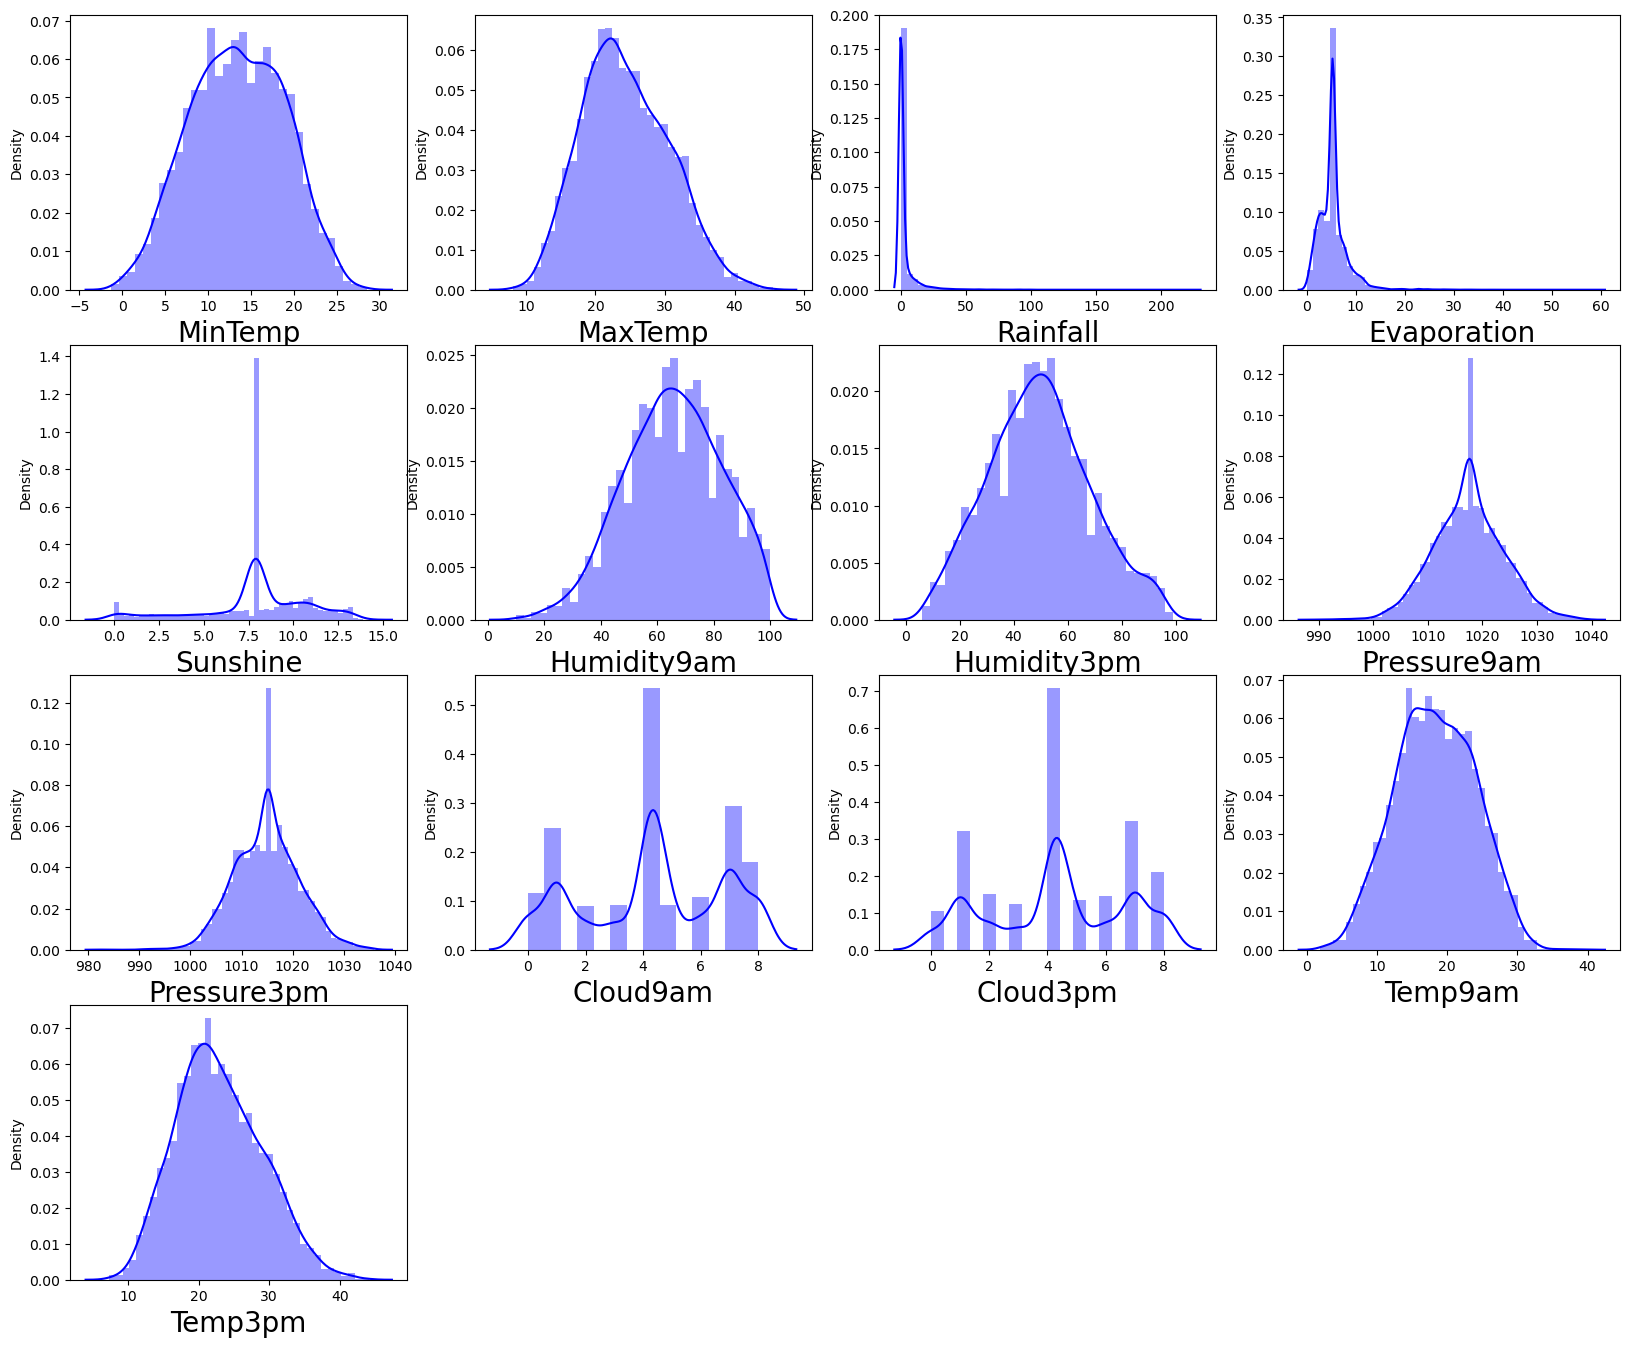

In [108]:
# Checking how the data has been distributed in each column

numerical_cols=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','Humidity9am', 'Humidity3pm', 'Pressure9am', 
                    'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

plt.figure(figsize=(20,25),facecolor="white")
plotnumber = 1

for column in numerical_cols:
    if plotnumber <= 18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df1[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    


In [109]:
df1.skew()

MinTemp        -0.043317
MaxTemp         0.296200
Rainfall        8.601063
Evaporation     3.568028
Sunshine       -0.801904
WindSpeed9am    1.015864
WindSpeed3pm    0.526224
Humidity9am    -0.188031
Humidity3pm     0.168829
Pressure9am     0.023080
Pressure3pm     0.046177
Cloud9am       -0.198495
Cloud3pm       -0.140178
Temp9am        -0.011099
Temp3pm         0.318150
RainToday       1.211631
RainTomorrow    1.217713
dtype: float64

# ## Checking for Outlier

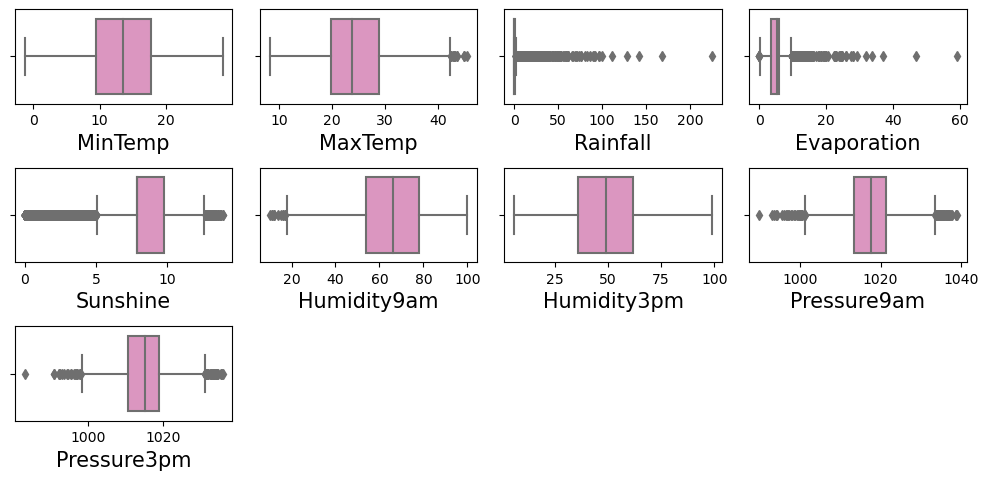

In [111]:
#lets check the outliers by plotting boxplot of numerical column

plt.figure(figsize = (10,6), facecolor ="white")
plotnumber = 1 
for col in numerical_cols:
    if plotnumber<=9:
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(df1[col],palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()


# Remove outlier using z score

In [112]:

from scipy.stats import zscore

out_features=df1[['WindSpeed9am','Rainfall','Evaporation','RainToday','RainTomorrow']]
z=np.abs(zscore(out_features))
z

,WindSpeed9am,Rainfall,Evaporation,RainToday,RainTomorrow
0,0.591701,0.230757,0.004952,0.563461,0.561998
1,1.161204,0.295292,0.004952,0.563461,0.561998
2,0.482145,0.295292,0.004952,0.563461,0.561998
3,0.394308,0.295292,0.004952,0.563461,0.561998
4,0.832534,0.187733,0.004952,0.563461,0.561998
...,...,...,...,...,...
8419,0.043918,0.295292,0.004952,0.563461,0.561998
8420,0.175195,0.295292,0.004952,0.563461,0.561998
8421,0.175195,0.295292,0.004952,0.563461,0.561998
8422,0.613421,0.295292,0.004952,0.563461,0.561998


In [113]:
#threshold =3

np.where(z>3)

(array([ 351,  369,  524,  537,  551,  606,  629,  630,  635,  727,  740,
         769,  770,  770,  791,  792,  794,  916,  961,  962,  996, 1000,
        1023, 1024, 1114, 1115, 1168, 1169, 1170, 1230, 1231, 1232, 1263,
        1264, 1324, 1376, 1424, 1470, 1540, 1541, 1577, 1646, 1649, 1653,
        1653, 1658, 1666, 1672, 1680, 1686, 1693, 1694, 1699, 1700, 1702,
        1706, 1710, 1712, 1719, 1725, 1733, 1739, 1747, 1753, 1761, 1767,
        1771, 1785, 1798, 1801, 1819, 1837, 1843, 1859, 1860, 1874, 1881,
        1893, 1932, 1935, 1939, 1951, 1958, 1972, 1976, 1984, 1990, 1995,
        2051, 2077, 2086, 2088, 2142, 2144, 2153, 2166, 2169, 2233, 2274,
        2286, 2322, 2323, 2324, 2330, 2333, 2386, 2393, 2411, 2422, 2425,
        2450, 2457, 2464, 2465, 2475, 2481, 2494, 2494, 2505, 2512, 2513,
        2514, 2528, 2586, 2681, 2707, 2734, 2740, 2759, 2766, 2771, 2782,
        2793, 2804, 2826, 2827, 2854, 2873, 2874, 2918, 2940, 2962, 2963,
        2964, 2966, 2984, 2990, 2991, 

In [114]:
df2=df1[(z<3).all(axis=1)]

df2.shape

(5057, 17)

In [115]:
#shape of old and new dataframe

print("old data frame",df1.shape[0])
print("new data frame",df2.shape[0])

old data frame 5266
new data frame 5057


In [116]:
print("Data loss percentage",((df1.shape[0]-df2.shape[0])/df1.shape[0])*100)

Data loss percentage 3.968856817318648


In [117]:
df2.shape

(5057, 17)

# #Checking skewness in each column

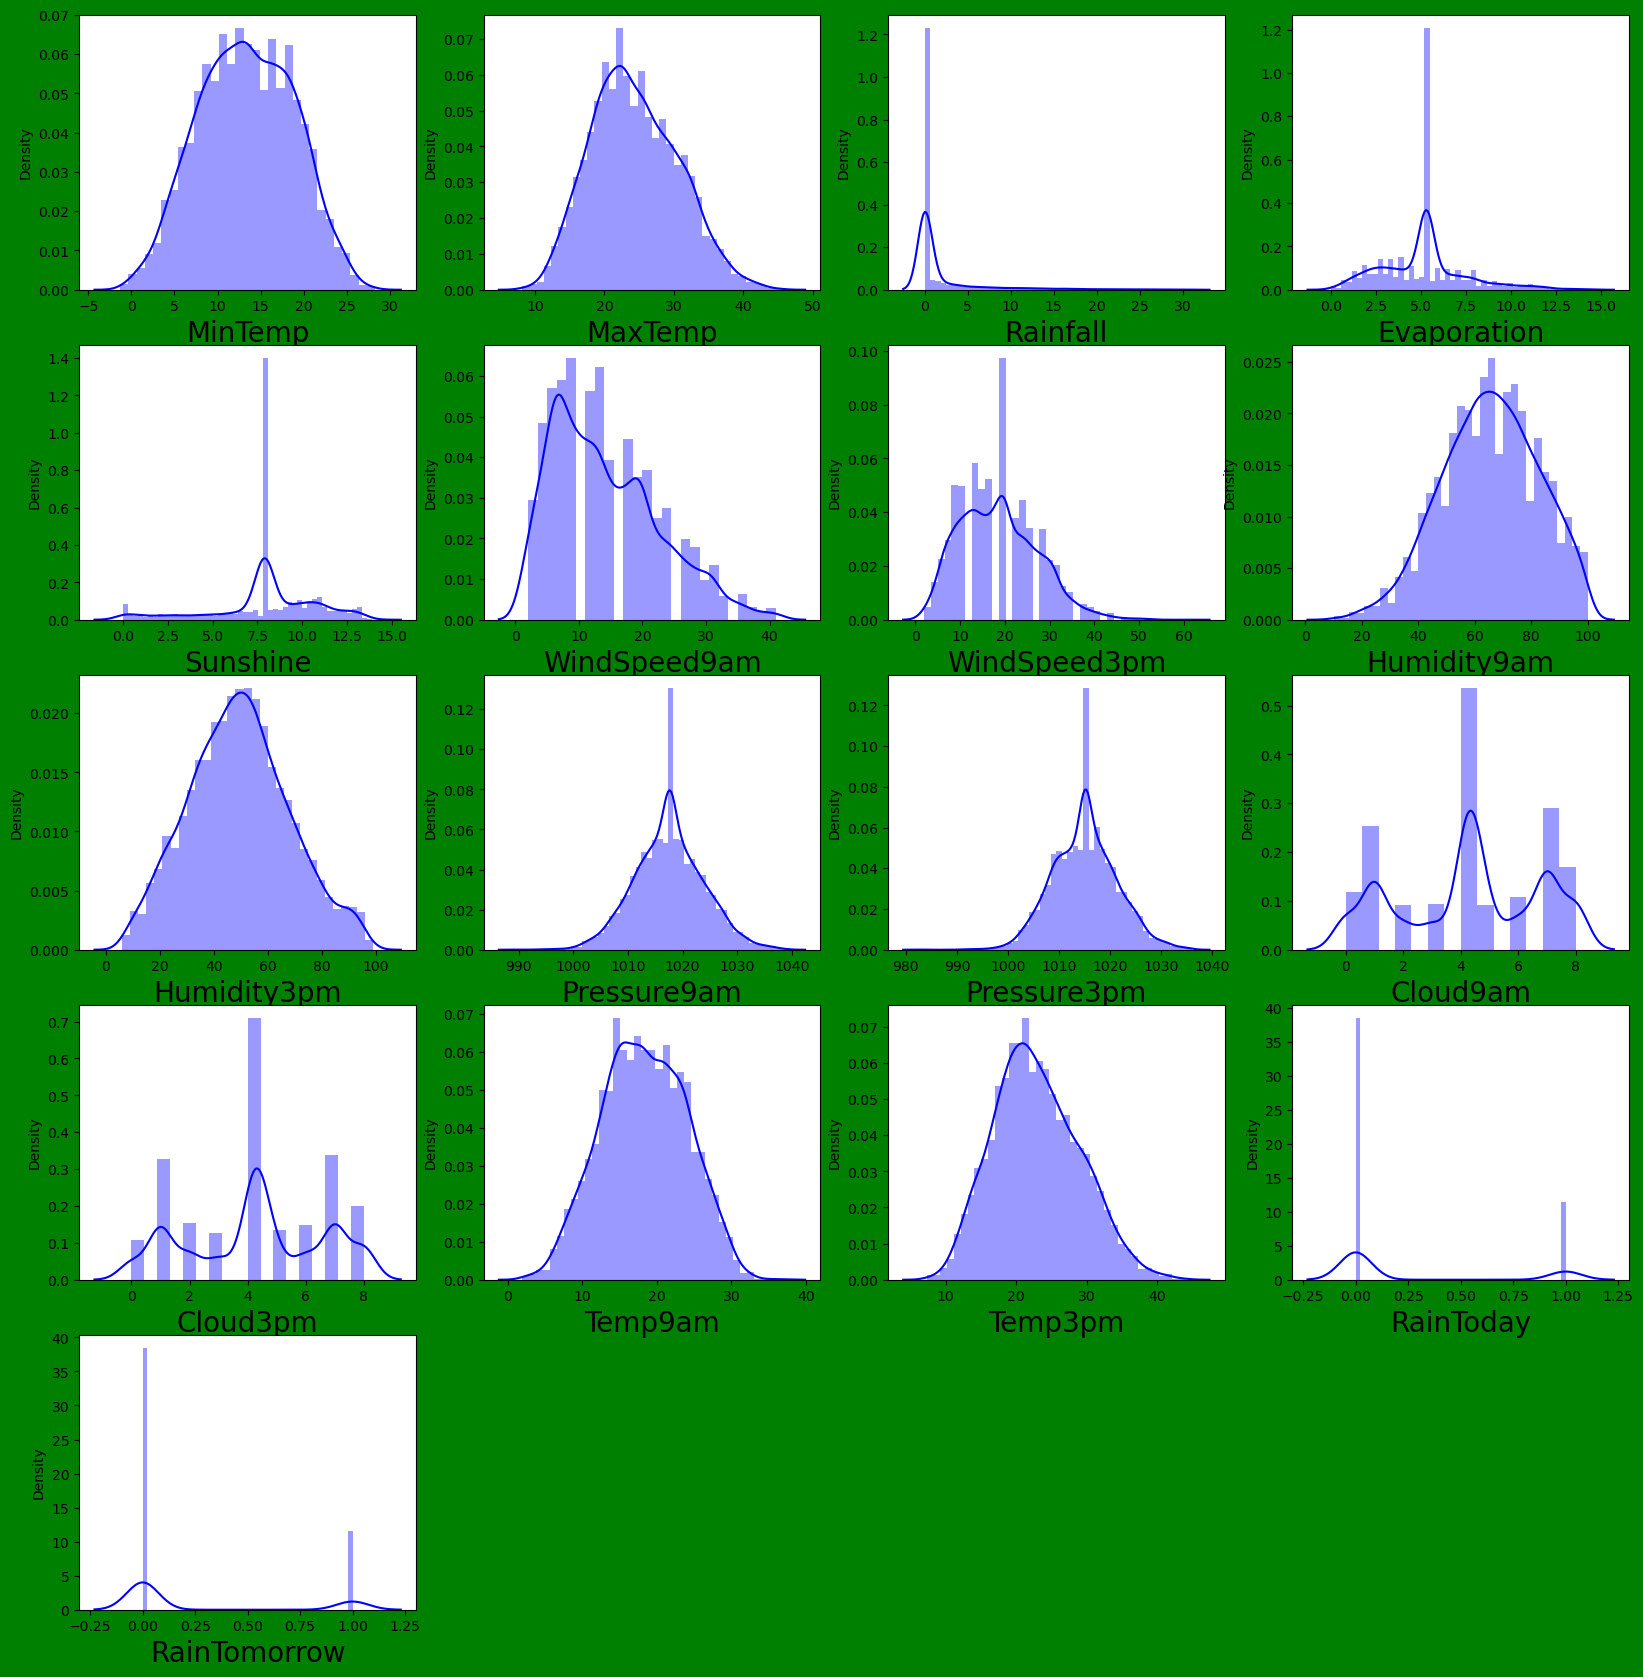

In [118]:
plt.figure(figsize=(20,25),facecolor="green")
plotnumber = 1

for column in df2:
    if plotnumber <= 18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df2[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    
        

There are still skewness in some columns

In [119]:
df2.skew()

MinTemp        -0.024924
MaxTemp         0.285339
Rainfall        3.344758
Evaporation     0.654974
Sunshine       -0.809459
WindSpeed9am    0.720940
WindSpeed3pm    0.487796
Humidity9am    -0.193191
Humidity3pm     0.160861
Pressure9am     0.050351
Pressure3pm     0.066372
Cloud9am       -0.183828
Cloud3pm       -0.125478
Temp9am        -0.015318
Temp3pm         0.308653
RainToday       1.283698
RainTomorrow    1.279721
dtype: float64

In [124]:
new_df=df2.copy()


Skewness is a statistical term and it is a way to estimate or measure the shape of a distribution. Skewness can be two types:

if skewness is (-0.5 to +0.5 ) is normally distributed, here skewness of Raintoday and RainTomorrow is 1.2 so the weight in the left tail of the distribution. The skewness of Rainfall is 3, which is higher skewness is on the left side. 


Skewness = 0: Then normally distributed.
Skewness > 0: Then more weight in the left tail of the distribution.
Skewness < 0: Then more weight in the right tail of the distribution.

In [125]:
#Lets remove skewness using log method:

skewed_columns = ['RainToday','RainTomorrow','Rainfall']

for i in skewed_columns:
    new_df[i]=np.cbrt(new_df[i])


In [126]:
new_df.skew()

MinTemp        -0.024924
MaxTemp         0.285339
Rainfall        0.858873
Evaporation     0.654974
Sunshine       -0.809459
WindSpeed9am    0.720940
WindSpeed3pm    0.487796
Humidity9am    -0.193191
Humidity3pm     0.160861
Pressure9am     0.050351
Pressure3pm     0.066372
Cloud9am       -0.183828
Cloud3pm       -0.125478
Temp9am        -0.015318
Temp3pm         0.308653
RainToday       1.283698
RainTomorrow    1.279721
dtype: float64

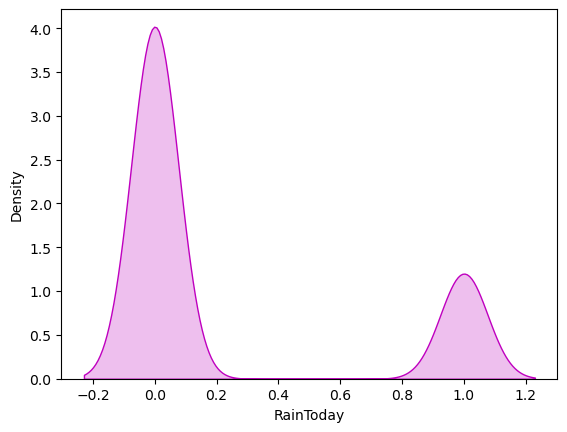

In [127]:
#Let visualize how the data distributed in temperature forcasting score after removing skewness

sns.distplot(new_df['RainToday'],color = "m",kde_kws = {"shade":True},hist = False)
plt.show()

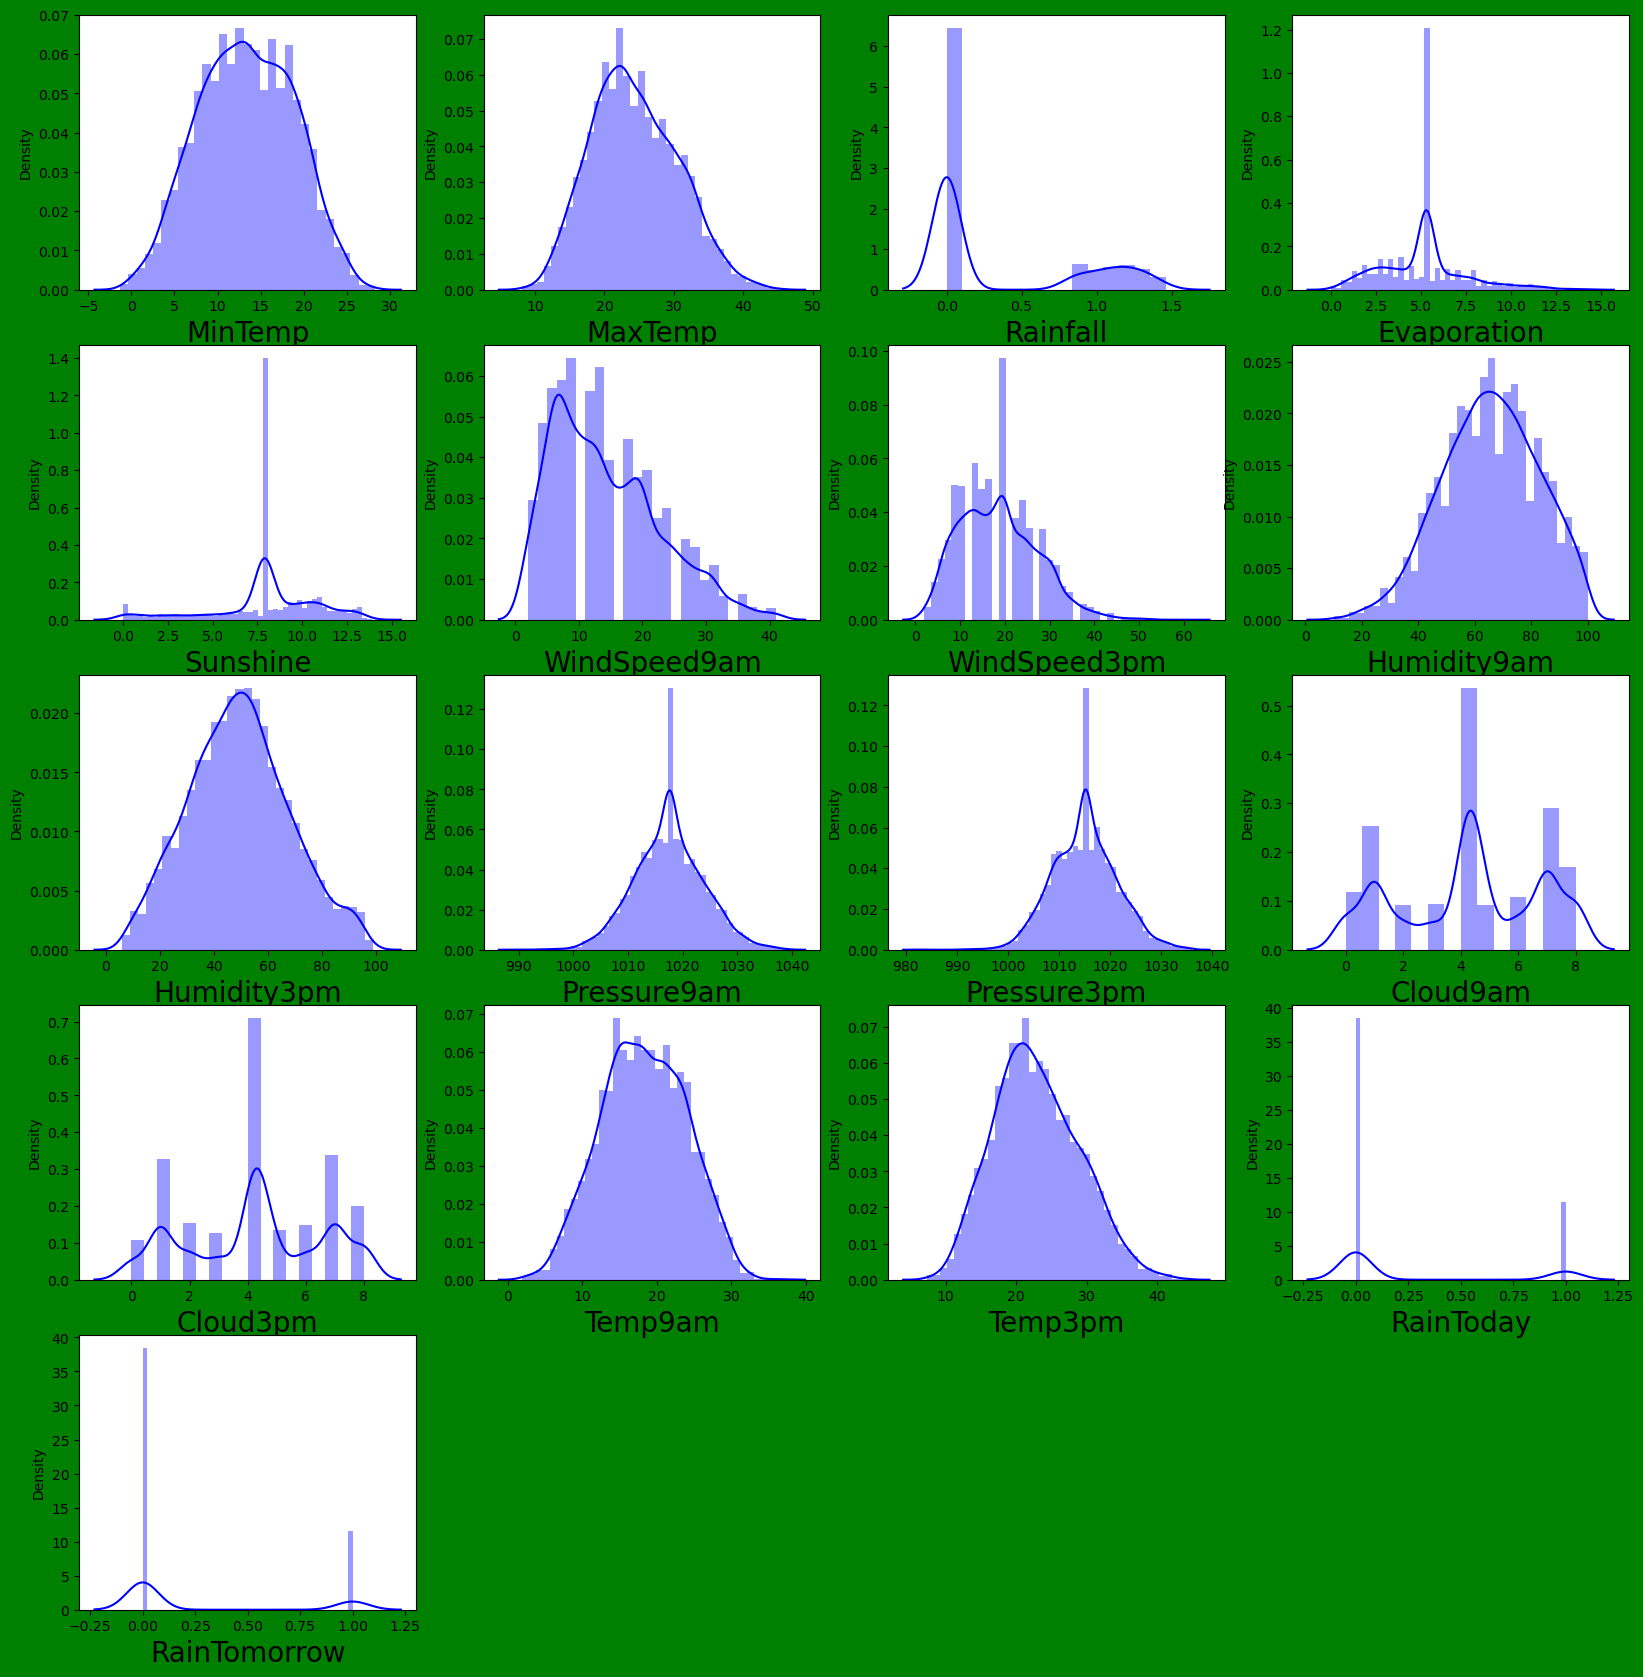

In [129]:
#Rechecking the skewness level in the dataframe df2

plt.figure(figsize=(20,25),facecolor="green")
plotnumber = 1

for column in new_df:
    if plotnumber <= 18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(new_df[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    
        

## Seperating features and label

In [172]:
#Seperating the independent and target variables into x and y

x = new_df.drop(["RainToday","RainTomorrow"],axis=1)
y1 = new_df['RainToday'].astype(int)
y2 = new_df['RainTomorrow'].astype(int)

print("Feature Dimension",x.shape)
print("Label Dimension",y1.shape)
print("Label Dimension",y2.shape)

Feature Dimension (5057, 10)
Label Dimension (5057,)
Label Dimension (5057,)


## Feature Scaling using Standard Scalarization

In [170]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns =x.columns)
x

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,-0.016466,-0.067339,0.476905,0.237808,0.137748,0.688203,0.631000,0.049687,-1.719713,-1.460662,-1.233548,1.364983,-0.135607,-0.153248,-0.015404
1,-1.150142,0.294085,-1.114526,0.237808,0.137748,-1.257821,0.395148,-1.553589,-1.557983,-1.008767,-1.122630,-0.177388,-0.135607,-0.098851,0.405116
2,-0.110939,0.392655,-1.114526,0.237808,0.137748,0.566576,0.866851,-1.909872,-1.288434,-1.476244,-0.980020,-0.177388,-1.161954,0.590173,0.220087
3,-0.810040,0.770507,-1.114526,0.237808,0.137748,-0.406435,-1.137885,-1.494208,-2.043172,0.082013,-0.330355,-0.177388,-0.135607,0.064339,0.775174
4,0.758212,1.476925,0.569845,0.237808,0.137748,-0.892941,0.159297,0.702873,-1.126704,-0.977602,-1.407849,0.943938,1.491261,0.009942,1.313439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7783,1.278770,-0.100929,1.277437,0.237808,0.137748,-1.233206,-1.296875,1.035122,1.797746,0.086113,0.037248,-0.177388,-0.135607,0.585694,-0.379804
7784,-0.908136,-1.536283,0.979248,-0.057496,0.137748,0.795950,0.395148,0.088459,0.488371,-1.691486,-1.239272,-0.177388,-0.135607,-1.128824,-1.501313
7785,0.216867,-0.059950,1.127688,0.237808,0.137748,0.967922,0.395148,-0.512909,-0.342301,-0.180561,-0.125735,-0.058701,-0.571850,0.115537,-0.041896
7786,-0.957483,-1.656579,0.799506,-0.977049,-1.817276,0.143871,0.066508,0.697039,0.561290,1.463244,1.655015,0.943938,0.722838,-1.554485,-1.533687


In [171]:
print(x.shape) # (4, 2) print(y1.shape) # (4,) print(np.bincount(y1)) # [2, 2]

(7788, 15)


SM = SMOTE()
x2,y2 = SM.fit_resample(x,y2)


In [158]:
y1.value_counts()
y2.value_counts()
y1
y2

0       0
1       0
2       0
3       0
4       0
       ..
8419    0
8420    0
8421    0
8422    0
8423    0
Name: RainTomorrow, Length: 5057, dtype: int32

In [159]:
y2.value_counts().sum()


5057

## Checking Variance Inflation Factor(VIF)


In [173]:
#Finding variance inflaction factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,8.729743,MinTemp
1,1.975399,Rainfall
2,9.377211,Evaporation
3,12.086819,Sunshine
4,5.404947,WindSpeed9am
5,7.676240,WindSpeed3pm
6,26.820436,Humidity9am
7,17.057814,Humidity3pm
8,8.207493,Cloud9am
9,7.576788,Cloud3pm


The values are higher than 10 so we need to remove MaxTemp, Pressure9am,Pressure3pm, Temp9am, Temp3pm

In [ ]:
new_df.drop(columns=['MaxTemp', 'Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm'],axis=1,inplace=True)

In [174]:
pd.DataFrame(x).describe()

,MinTemp,Rainfall,Evaporation,Sunshine,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm
count,5057.000000,5057.000000,5057.000000,5057.000000,5057.000000,5057.000000,5057.000000,5057.000000,5057.000000,5057.000000
mean,13.357174,0.363940,5.098779,7.998988,14.154044,18.516512,65.508307,49.387278,4.288076,4.263751
std,5.494950,0.533663,2.368859,2.919624,8.444521,8.644812,16.994133,18.581451,2.434271,2.338961
min,-1.300000,0.000000,0.000000,0.000000,2.000000,2.000000,10.000000,6.000000,0.000000,0.000000
25%,9.200000,0.000000,3.400000,7.890896,7.000000,11.000000,54.000000,36.000000,2.000000,2.000000
50%,13.300000,0.000000,5.302395,7.890896,13.000000,19.000000,66.000000,49.000000,4.336806,4.320988
75%,17.600000,0.944822,5.800000,9.900000,20.000000,24.000000,78.000000,62.000000,7.000000,6.000000
max,28.300000,1.462447,14.400000,13.900000,41.000000,61.000000,100.000000,99.000000,8.000000,8.000000


# Modeling RainToday

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.experimental import enable_hist_gradient_boosting


# Rain Today Training and Testing

In [142]:
#finding the best Random state: 

from sklearn.neighbors import KNeighborsRegressor

maxAcc = 0
maxRS = 0

for i in range(200, 500):
    x1_train, x1_test, y1_train, y1_test = train_test_split(x, y1, test_size=0.20, random_state=i)
    KNN = KNeighborsRegressor(n_neighbors=5)  
    KNN.fit(x_train, y_train)
    pred = KNN.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i

print("Max r2 score accuracy is", maxAcc, "at random_state", maxRS)

Max r2 score accuracy is 0.8434790175216549 at random_state 200


# Rain Tommorow Training/Testing data

In [189]:
from sklearn.neighbors import KNeighborsRegressor

maxAcc = 0
maxRS = 0

for i in range(200, 500):
    x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.20, random_state=i)
    KNN = KNeighborsRegressor(n_neighbors=5)  
    KNN.fit(x_train, y_train)
    pred = KNN.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i

print("Max r2 score accuracy is", maxAcc, "at random_state", maxRS)

Max r2 score accuracy is 0.8434790175216549 at random_state 200


# Modeling

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score


# Model building for Rain Today


In [204]:
#Model building using different type of regressor by looping them all to get the accuracy of each regressor:

model=[RandomForestRegressor(),LinearRegression(),DecisionTreeRegressor(),
       GradientBoostingRegressor(),KNeighborsRegressor(),SVC()]
for m in model:
    print("--------------------------------------------------------------------")
    
    m.fit(x1_train,y1_train)
    
    print('Accuracy score of :',m)
    # prediction
    pred=m.predict(x1_test)
    
    print('R2_Score:',r2_score(y1_test,pred))

    # Mean Absolute Error (MAE)
    print('MAE:',mean_absolute_error(y1_test, pred))

    # Mean Squared Error (MSE)
    print('MSE:',mean_squared_error(y1_test, pred))

   # Root Mean Squared Error (RMSE)
    print("RMSE:",np.sqrt(mean_squared_error(y1_test, pred)))

   # Checking cv score 
    print("Cross_Validaton_Score",cross_val_score(m,x,y1,cv=5).mean())

    print ("The difference between R2 score and CV is", (r2_score(y1_test,pred)-(cross_val_score(m,x,y1,cv=5).mean())))
    
    print("-----------------------------------------------------------------------")
    

--------------------------------------------------------------------
Accuracy score of : RandomForestRegressor()
R2_Score: 1.0
MAE: 0.0
MSE: 0.0
RMSE: 0.0
Cross_Validaton_Score 1.0
The difference between R2 score and CV is 0.0
-----------------------------------------------------------------------
--------------------------------------------------------------------
Accuracy score of : LinearRegression()
R2_Score: 0.869643024504319
MAE: 0.09278756505199307
MSE: 0.03258661242194221
RMSE: 0.18051762357715162
Cross_Validaton_Score 0.7525801384833312
The difference between R2 score and CV is 0.1170628860209878
-----------------------------------------------------------------------
--------------------------------------------------------------------
Accuracy score of : DecisionTreeRegressor()
R2_Score: 1.0
MAE: 0.0
MSE: 0.0
RMSE: 0.0
Cross_Validaton_Score 1.0
The difference between R2 score and CV is 0.0
-----------------------------------------------------------------------
----------------

In [218]:
model=[RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), BaggingClassifier()]

for m in model:
    print("--------------------------------------------------------------------")
    
    m.fit(x1_train,y1_train)
    
    print('Accuracy score of :',m)
    # prediction
    pred=m.predict(x1_test)
    
    print('Accuracy_Score:',r2_score(y1_test,pred))

    # Mean Absolute Error (MAE)
    print('MAE:',mean_absolute_error(y1_test, pred))

    # Mean Squared Error (MSE)
    print('MSE:',mean_squared_error(y1_test, pred))

   # Root Mean Squared Error (RMSE)
    print("RMSE:",np.sqrt(mean_squared_error(y1_test, pred)))

   # Checking cv score 
    print("Cross_Validaton_Score",cross_val_score(m,x,y1,cv=5).mean())

    #print ("f1score", f1score = f1_score(y_test, y_pred))

    
    print ("The difference between accuracy score and CV is", (accuracy_score(y_test,pred)-(cross_val_score(m,x,y1,cv=5).mean())))
    
    print("-----------------------------------------------------------------------")
    

--------------------------------------------------------------------
Accuracy score of : RandomForestClassifier()
Accuracy_Score: 1.0
MAE: 0.0
MSE: 0.0
RMSE: 0.0
Cross_Validaton_Score 1.0
The difference between accuracy score and CV is 0.0
-----------------------------------------------------------------------
--------------------------------------------------------------------
Accuracy score of : ExtraTreesClassifier()
Accuracy_Score: 0.9794591886511358
MAE: 0.005134788189987163
MSE: 0.005134788189987163
RMSE: 0.07165743639000186
Cross_Validaton_Score 0.9970338138187449
The difference between accuracy score and CV is -0.0025642498821246695
-----------------------------------------------------------------------
--------------------------------------------------------------------
Accuracy score of : GradientBoostingClassifier()
Accuracy_Score: 1.0
MAE: 0.0
MSE: 0.0
RMSE: 0.0
Cross_Validaton_Score 1.0
The difference between accuracy score and CV is 0.0
-----------------------------------

Hence, the best model is the GradientBoostingRegressor() model since the  R2 score is 99%, it would be best to use this model for our final prediction model. 

# # Hyperparameter Tuning for Rain Today

Hyperparameter tuning is the art of finding the best settings for a machine learning model

Hyperparameters are the knobs that control the learning process, such as learning rate, number of layers, or Different hyperparameters can lead to different levels of accuracy, speed, and complexity for the same model and data

In [221]:
from sklearn.model_selection import GridSearchCV

# Create an ExtraTreeClassifier instance

ET = ExtraTreesClassifier()

param_grid = { 'n_estimators': [10, 50, 100], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4], 'random_state': [40] }

# Create a GridSearchCV object with the parameter grid and cross-validation folds (cv)
grid = GridSearchCV(ET, param_grid, cv=5)

# Fit the GridSearchCV object to your data
grid.fit(x1_train, y1_train)  # Replace X and y with your training data and target labels

print(grid.best_params_)


{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 40}


In [222]:
#Create a final model

Final_model1 = ExtraTreesClassifier()

Final_model1.fit(x1_train,y1_train)

#predict the target variable using the test data

y1_prediction= Final_model1.predict(x1_test)
y1_prediction

acc = r2_score(y1_test,pred)

print(acc*100)

100.0


# saving the model


In [223]:
import joblib

joblib.dump(Final_model2,"Rain_Today.pkl")

['Rain_Today.pkl']

In [225]:
# Predicting the saved model

#Lets load the saved model and get the prediction

model1 = joblib.load("Rain_Today.pkl")


a= np.array(y1_test)
df=pd.DataFrame()

df["Predicted"]=y1_prediction
df["Original"]=a
df

,Predicted,Original
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
1553,0,0
1554,0,0
1555,0,0
1556,1,1


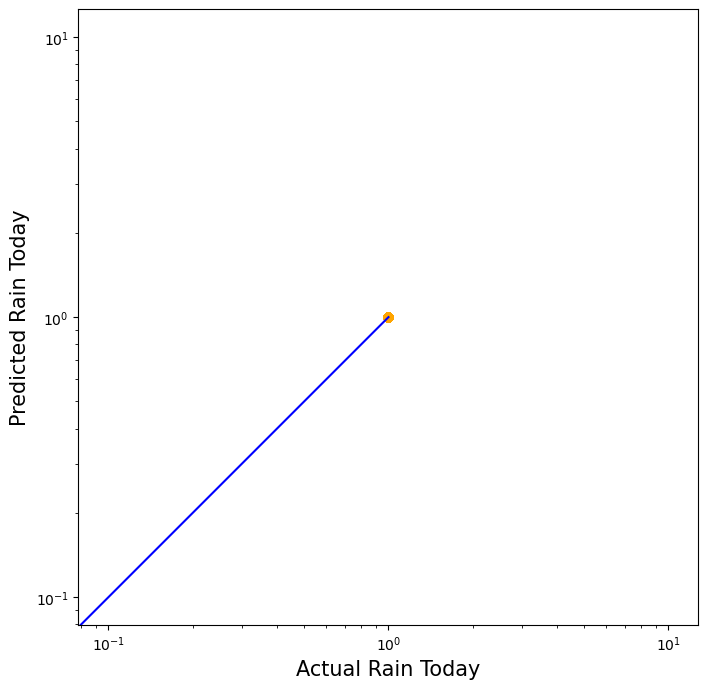

In [226]:
#Lets view it on the graph the relation between predicted and original values

plt.figure(figsize=(8,8))
plt.scatter(y1_test, y1_prediction, c='orange')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y1_prediction), max(y1_test))
p2 = min(min(y1_prediction), min(y1_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Rain Today', fontsize=15)
plt.ylabel('Predicted Rain Today', fontsize=15)
plt.axis('equal')
plt.show()


# # Model building for Rain Tommorow

In [209]:
#Model building using different type of regressor by looping them all to get the accuracy of each regressor:

model=[RandomForestClassifier(), ExtraTreesClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), BaggingClassifier()]

for m in model:
    print("--------------------------------------------------------------------")
    
    m.fit(x2_train,y2_train)
    
    print('Accuracy score of :',m)
    # prediction
    pred=m.predict(x2_test)
    
    print('R2_Score:',r2_score(y2_test,pred))

    # Mean Absolute Error (MAE)
    print('MAE:',mean_absolute_error(y2_test, pred))

    # Mean Squared Error (MSE)
    print('MSE:',mean_squared_error(y2_test, pred))

   # Root Mean Squared Error (RMSE)
    print("RMSE:",np.sqrt(mean_squared_error(y2_test, pred)))

   # Checking cv score 
    print("Cross_Validaton_Score",cross_val_score(m,x,y2,cv=5).mean())

    print ("The difference between R2 score and CV is", (r2_score(y2_test,pred)-(cross_val_score(m,x,y2,cv=5).mean())))
    
    print("-----------------------------------------------------------------------")
    

--------------------------------------------------------------------
Accuracy score of : RandomForestClassifier()
R2_Score: 0.09589852053968784
MAE: 0.16403162055335968
MSE: 0.16403162055335968
RMSE: 0.4050081734401908
Cross_Validaton_Score 0.8164944503739499
The difference between R2 score and CV is -0.7231637314473481
-----------------------------------------------------------------------
--------------------------------------------------------------------
Accuracy score of : ExtraTreesClassifier()
R2_Score: 0.03598818153930572
MAE: 0.17490118577075098
MSE: 0.17490118577075098
RMSE: 0.41821189099635964
Cross_Validaton_Score 0.8127375548805041
The difference between R2 score and CV is -0.7773408903693042
-----------------------------------------------------------------------
--------------------------------------------------------------------
Accuracy score of : GradientBoostingClassifier()
R2_Score: 0.07411294272136704
MAE: 0.16798418972332016
MSE: 0.16798418972332016
RMSE: 0.4098587

# Hyperparameter Tuning for Rain Tommorow

Hyperparameter tuning is the art of finding the best settings for a machine learning model

Hyperparameters are the knobs that control the learning process, such as learning rate, number of layers, or Different hyperparameters can lead to different levels of accuracy, speed, and complexity for the same model and data

In [196]:
from sklearn.model_selection import GridSearchCV

# Create an RandomForestClassifier instance

RF = RandomForestClassifier()

# Define the hyperparameter grid

param_grid = { 'n_estimators': [10, 50, 100], 'max_depth': [3, 4, 5], 
              'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'random_state': [40] }

# Create a GridSearchCV object with the parameter grid and cross-validation folds (cv)
grid = GridSearchCV(RF, param_grid, cv=5)

# Fit the GridSearchCV object to your data
grid.fit(x2_train, y2_train)  # Replace X and y with your training data and target labels

print(grid.best_params_)



{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10, 'random_state': 40}


In [179]:
# Fitting our GridSearchCV Object

grid.fit(x2_train, y2_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 110, 150],
                         'random_state': [40], 'subsample': [0.8, 1.0]})

In [197]:
grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 10,
 'random_state': 40}

In [198]:
#Create a final model

Final_model2 = RandomForestClassifier()

Final_model2.fit(x2_train,y2_train)

#predict the target variable using the test data

y2_prediction= Final_model2.predict(x2_test)
y2_prediction

acc = accuracy_score(y2_test,pred)

print(acc*100)

79.74308300395256


# saving the model


In [199]:
import joblib

joblib.dump(Final_model2,"Rain_Tommorow.pkl")

['Rain_Tommorow.pkl']

In [200]:
# Predicting the saved model

#Lets load the saved model and get the prediction

model = joblib.load("Rain_Tommorow.pkl")


a= np.array(y2_test)
df=pd.DataFrame()

df["Predicted"]=y2_prediction
df["Original"]=a
df

,Predicted,Original
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
1007,0,0
1008,0,0
1009,0,0
1010,0,0


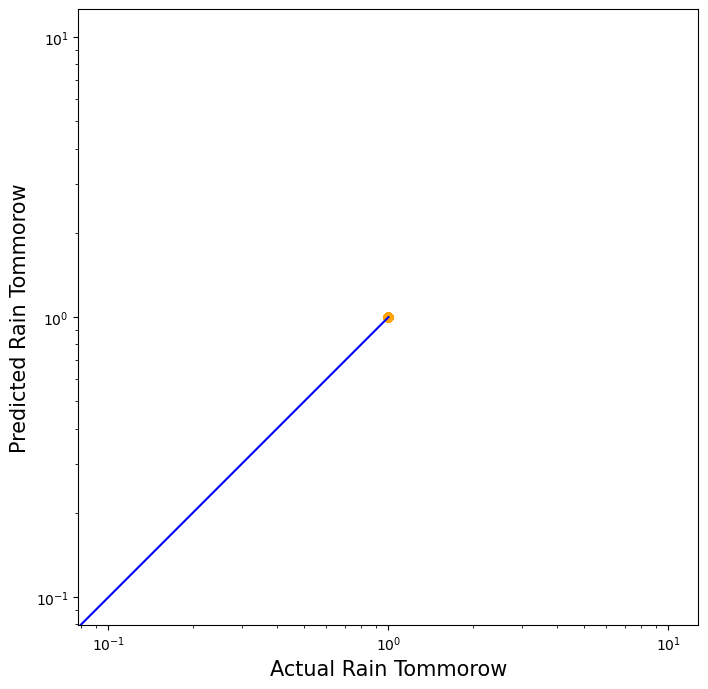

In [202]:
#Lets view it on the graph the relation between predicted and original values

plt.figure(figsize=(8,8))
plt.scatter(y2_test, y2_prediction, c='orange')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y2_prediction), max(y2_test))
p2 = min(min(y2_prediction), min(y2_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Rain Tommorow', fontsize=15)
plt.ylabel('Predicted Rain Tommorow', fontsize=15)
plt.axis('equal')
plt.show()


# Final Analysis 

The model was build to predict Rain Today or Rain Tommorow, while predicting both we used Regression and Classification models. To predict Rain Today we used GradientBoostingRegressor since it gives us the highest accuracy of 99% while predicting Rain Tommorow we were able to use classification model, RandomForestClassifier since it gives us the accuray of 90%. 

# Rain Today 

Accuracy score of : GradientBoostingRegressor()
R2_Score: 0.9999999992944031
MAE: 1.3280967620738563e-05
MSE: 1.7638499155154688e-10
RMSE: 1.3281001150197483e-05
Cross_Validaton_Score 0.9999999992846682
The difference between R2 score and CV is 9.734879569123223e-12

Our Model is 100% accurate

# Rain Tommorow

Accuracy score of : RandomForestClassifier()
R2_Score: 0.09589852053968784
MAE: 0.16403162055335968
MSE: 0.16403162055335968
RMSE: 0.4050081734401908
Cross_Validaton_Score 0.8164944503739499
The difference between R2 score and CV is -0.7231637314473481

our Model is 79% accurate 